In [2]:
import numpy as np
import pandas as pd

# Data Preprocessing


In [3]:
df = pd.read_csv("pune.csv" , index_col="Date")
df

,Time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,maxtempC.1
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,00:00:00,31,13,0,11.0,6,1,31,10:17 AM,10:16 PM,...,7,0,50,0.0,1013,13,10,59,3,31
2009-01-01,01:00:00,31,13,0,11.0,6,1,31,10:17 AM,10:16 PM,...,9,0,47,0.0,1013,14,10,57,4,31
2009-01-01,02:00:00,31,13,0,11.0,6,1,31,10:17 AM,10:16 PM,...,10,0,44,0.0,1013,14,10,55,5,31
2009-01-01,03:00:00,31,13,0,11.0,6,1,31,10:17 AM,10:16 PM,...,12,0,41,0.0,1013,15,10,54,6,31
2009-01-01,04:00:00,31,13,0,11.0,6,1,31,10:17 AM,10:16 PM,...,11,1,38,0.0,1014,16,10,68,6,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,19:00:00,29,18,0,11.0,6,1,37,11:34 AM,11:32 PM,...,20,3,49,0.0,1014,23,10,255,12,29
2020-01-01,20:00:00,29,18,0,11.0,6,1,37,11:34 AM,11:32 PM,...,19,3,53,0.0,1014,22,10,258,11,29
2020-01-01,21:00:00,29,18,0,11.0,6,1,37,11:34 AM,11:32 PM,...,18,2,57,0.0,1015,21,10,262,10,29


In [4]:
df.apply(pd.isnull).sum()/df.shape[0]

Time                 0.0
maxtempC             0.0
mintempC             0.0
totalSnow_cm         0.0
sunHour              0.0
uvIndex              0.0
uvIndex.1            0.0
moon_illumination    0.0
moonrise             0.0
moonset              0.0
sunrise              0.0
sunset               0.0
DewPointC            0.0
FeelsLikeC           0.0
HeatIndexC           0.0
WindChillC           0.0
WindGustKmph         0.0
cloudcover           0.0
humidity             0.0
precipMM             0.0
pressure             0.0
tempC                0.0
visibility           0.0
winddirDegree        0.0
windspeedKmph        0.0
maxtempC.1           0.0
dtype: float64

In [5]:
wt = df[["Time","maxtempC","mintempC","DewPointC","cloudcover","humidity","pressure","visibility","windspeedKmph","precipMM"]].copy()

In [6]:
wt

,Time,maxtempC,mintempC,DewPointC,cloudcover,humidity,pressure,visibility,windspeedKmph,precipMM
Date,,,,,,,,,,
2009-01-01,00:00:00,31,13,7,0,50,1013,10,3,0.0
2009-01-01,01:00:00,31,13,6,0,47,1013,10,4,0.0
2009-01-01,02:00:00,31,13,6,0,44,1013,10,5,0.0
2009-01-01,03:00:00,31,13,5,0,41,1013,10,6,0.0
2009-01-01,04:00:00,31,13,5,1,38,1014,10,6,0.0
...,...,...,...,...,...,...,...,...,...,...
2020-01-01,19:00:00,29,18,11,3,49,1014,10,12,0.0
2020-01-01,20:00:00,29,18,12,3,53,1014,10,11,0.0
2020-01-01,21:00:00,29,18,12,2,57,1015,10,10,0.0


In [7]:
wt["precipMM"].value_counts()

0.0     85023
0.1      3392
0.2      1881
0.3      1257
0.4       932
        ...  
7.8         1
8.1         1
11.0        1
5.4         1
12.2        1
Name: precipMM, Length: 103, dtype: int64

In [8]:
wt["maxtempC"].value_counts()

29    12216
30    11064
28    10128
31     7488
27     6120
37     5472
32     5448
38     5112
26     4488
25     4008
36     3672
33     3672
35     3600
34     3408
39     3384
24     2640
23     1824
40     1368
41      576
22      576
42       96
21       48
20       24
Name: maxtempC, dtype: int64

In [9]:
wt["mintempC"].value_counts()

22    19344
21    14400
23     9984
20     9096
19     7320
18     5856
24     5760
17     5496
16     5376
15     3240
14     2760
25     2736
13     1944
26     1320
12      744
27      432
11      312
28      120
29       96
10       72
30       24
Name: mintempC, dtype: int64

In [10]:
wt.dtypes

Time              object
maxtempC           int64
mintempC           int64
DewPointC          int64
cloudcover         int64
humidity           int64
pressure           int64
visibility         int64
windspeedKmph      int64
precipMM         float64
dtype: object

In [11]:
wt.index

Index(['2009-01-01', '2009-01-01', '2009-01-01', '2009-01-01', '2009-01-01',
       '2009-01-01', '2009-01-01', '2009-01-01', '2009-01-01', '2009-01-01',
       ...
       '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
       '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01'],
      dtype='object', name='Date', length=96432)

In [12]:
wt.index = pd.to_datetime(wt.index)
wt.index

DatetimeIndex(['2009-01-01', '2009-01-01', '2009-01-01', '2009-01-01',
               '2009-01-01', '2009-01-01', '2009-01-01', '2009-01-01',
               '2009-01-01', '2009-01-01',
               ...
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Date', length=96432, freq=None)

In [13]:
wt.index.year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=96432)

In [14]:
wt.index.year.value_counts().sort_index()

2009    8760
2010    8760
2011    8760
2012    8784
2013    8760
2014    8760
2015    8760
2016    8784
2017    8760
2018    8760
2019    8760
2020      24
Name: Date, dtype: int64

<AxesSubplot:xlabel='Date'>

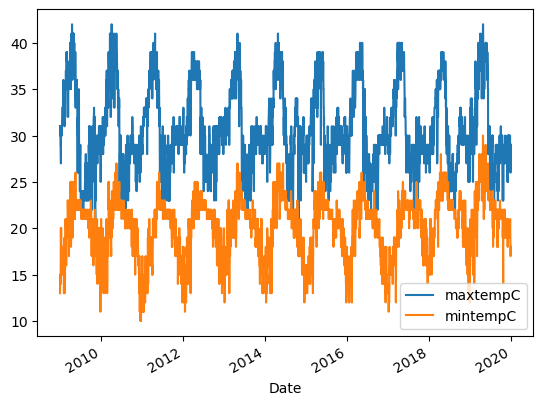

In [15]:
wt[["maxtempC","mintempC"]].plot()

<AxesSubplot:xlabel='Date'>

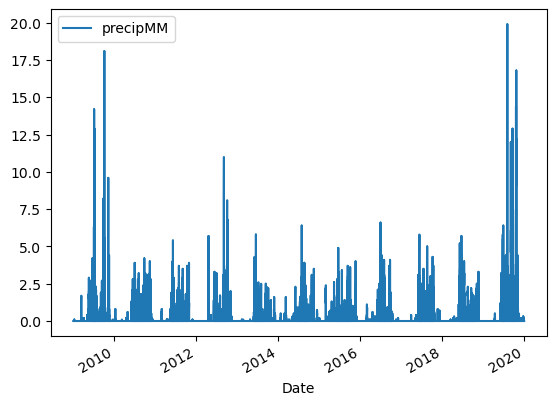

In [16]:
wt[["precipMM"]].plot()

In [17]:
wt.groupby(wt.index.year).sum()["precipMM"]

Date
2009     714.2
2010     578.4
2011     454.8
2012     450.0
2013     442.8
2014     396.6
2015     427.4
2016     478.5
2017     530.0
2018     487.4
2019    1787.4
2020       0.0
Name: precipMM, dtype: float64

<AxesSubplot:xlabel='Date'>

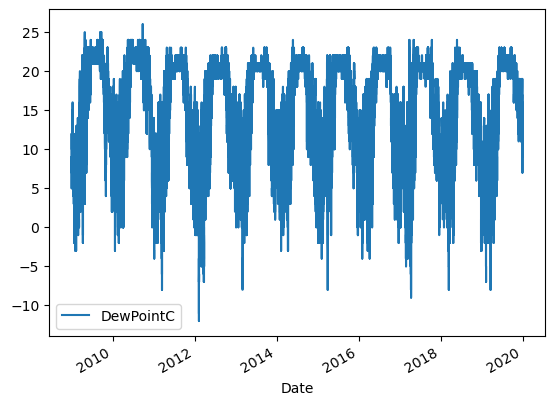

In [18]:
wt[["DewPointC"]].plot()

<AxesSubplot:xlabel='Date'>

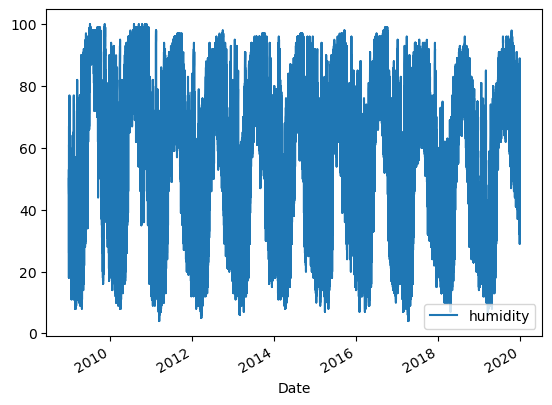

In [19]:
wt[["humidity"]].plot()

<AxesSubplot:xlabel='Date'>

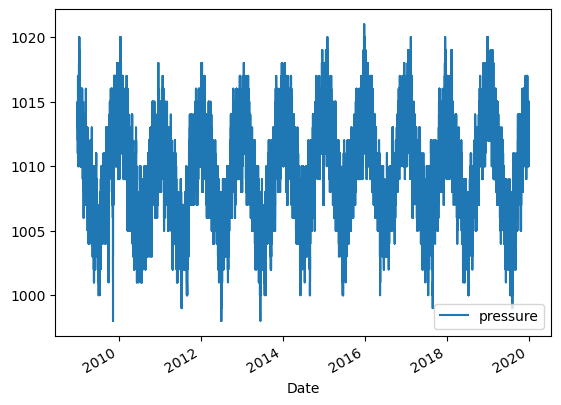

In [20]:
wt[["pressure"]].plot()

<AxesSubplot:xlabel='Date'>

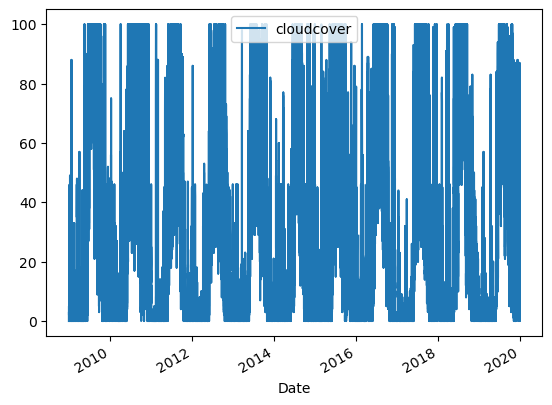

In [21]:
wt[["cloudcover"]].plot()

<AxesSubplot:xlabel='Date'>

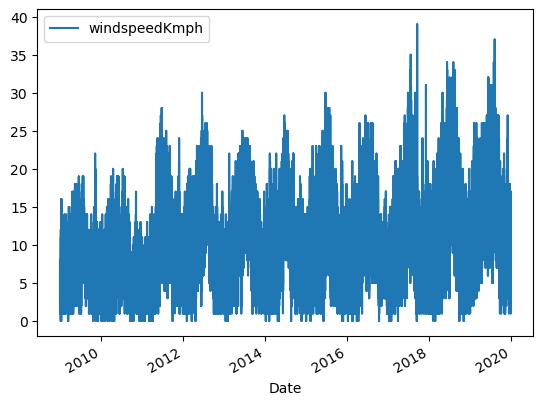

In [22]:
wt[["windspeedKmph"]].plot()

<AxesSubplot:xlabel='Date'>

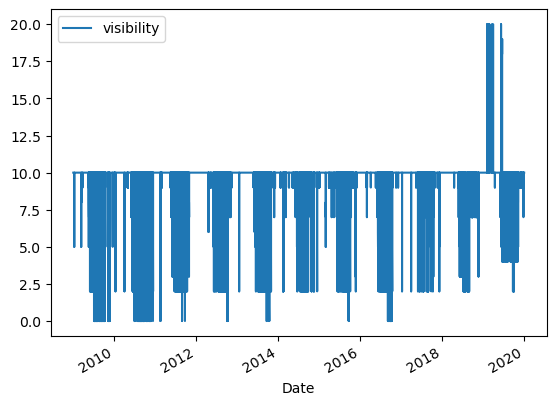

In [23]:
wt[["visibility"]].plot()

In [25]:
wt["target"] = wt.shift(-1)["precipMM"]
wt

,Time,maxtempC,mintempC,DewPointC,cloudcover,humidity,pressure,visibility,windspeedKmph,precipMM,target
Date,,,,,,,,,,,
2009-01-01,00:00:00,31,13,7,0,50,1013,10,3,0.0,0.0
2009-01-01,01:00:00,31,13,6,0,47,1013,10,4,0.0,0.0
2009-01-01,02:00:00,31,13,6,0,44,1013,10,5,0.0,0.0
2009-01-01,03:00:00,31,13,5,0,41,1013,10,6,0.0,0.0
2009-01-01,04:00:00,31,13,5,1,38,1014,10,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,19:00:00,29,18,11,3,49,1014,10,12,0.0,0.0
2020-01-01,20:00:00,29,18,12,3,53,1014,10,11,0.0,0.0
2020-01-01,21:00:00,29,18,12,2,57,1015,10,10,0.0,0.0


In [27]:
wt = wt.iloc[:-1,:].copy()
wt

,Time,maxtempC,mintempC,DewPointC,cloudcover,humidity,pressure,visibility,windspeedKmph,precipMM,target
Date,,,,,,,,,,,
2009-01-01,00:00:00,31,13,7,0,50,1013,10,3,0.0,0.0
2009-01-01,01:00:00,31,13,6,0,47,1013,10,4,0.0,0.0
2009-01-01,02:00:00,31,13,6,0,44,1013,10,5,0.0,0.0
2009-01-01,03:00:00,31,13,5,0,41,1013,10,6,0.0,0.0
2009-01-01,04:00:00,31,13,5,1,38,1014,10,6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,17:00:00,29,18,10,3,41,1012,10,14,0.0,0.0
2020-01-01,18:00:00,29,18,11,4,45,1013,10,13,0.0,0.0
2020-01-01,19:00:00,29,18,11,3,49,1014,10,12,0.0,0.0


In [29]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [31]:
predictors = ["maxtempC","mintempC","DewPointC","cloudcover","humidity","pressure","visibility","windspeedKmph"]

In [33]:
train= wt.loc[:"2017-12-31"]


In [34]:
test = wt.loc["2018-1-1":]

In [35]:
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [39]:
prediction = reg.predict(test[predictors])  

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
mean_absolute_error(test["target"],prediction)

0.1535570572137709

In [51]:
mean_squared_error(test["target"],prediction)

0.4095205767760452

In [52]:
r2_score(test["target"],prediction)

0.04532437333274408

In [47]:
combined = pd.concat([test["target"],pd.Series(prediction , index=test.index)],axis=1)
combined.columns = ["actual","prediction"]
combined

,actual,prediction
Date,,
2018-01-01,0.0,0.050537
2018-01-01,0.0,0.048484
2018-01-01,0.0,0.041175
2018-01-01,0.0,0.035568
2018-01-01,0.0,0.037942
...,...,...
2020-01-01,0.0,0.016549
2020-01-01,0.0,0.008757
2020-01-01,0.0,-0.006046


<AxesSubplot:xlabel='Date'>

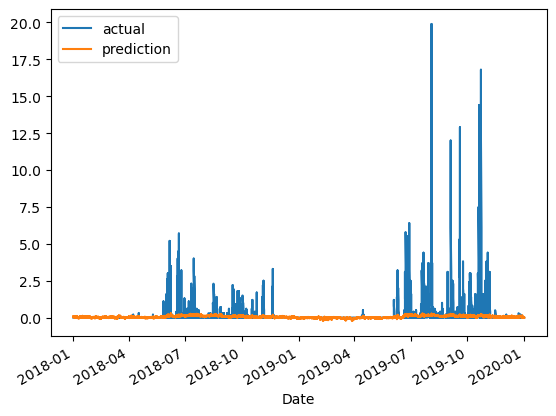

In [48]:
combined.plot()

In [49]:
reg.coef_

array([-0.01195416,  0.00463517,  0.00584046,  0.00058517, -0.00205355,
       -0.00955661, -0.01195766, -0.00355285])